## Building CNN to classify face with mask and face with no Mask 

In [6]:
import os 
import tensorflow as tf
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [9]:
base_dir  = os.path.join(os.getcwd(),'dataset/')
cate = os.listdir(base_dir)
cate

['with_mask', 'without_mask']

### import the Image Dataset

#### Catagories
0 - with mask
1 - without mask


In [58]:
image_size =100
data_array = []
for i in cate:
    path_ = os.path.join(base_dir , i)
    label = cate.index(i)
    for img_name in os.listdir(path_):
        img_path = os.path.join(path_ , img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img , (image_size , image_size))
        data_array.append([img , label])


### Shuffling , splitting and Normalising  the image data

In [59]:
np.random.shuffle(data_array)

In [60]:
x=[]
y=[]
for x_val , y_val in data_array:
    x.append(x_val)
    y.append(y_val)
x=np.array(x)
y=np.array(y)


y=to_categorical(y)

In [61]:
x.shape

(7553, 100, 100, 3)

In [62]:
x = x/255.0

In [63]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y =train_test_split(x, y , test_size=0.2)


### Building Model

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , Flatten , Conv2D , MaxPool2D


In [65]:
model = Sequential()
model.add(Conv2D(filters=100 , kernel_size=(3,3) , activation='relu' , padding='same' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=200, kernel_size=(3,3) , activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=300, kernel_size=(3,3) , activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())


model.add(Dense(64 , activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(2 , activation='softmax'))

In [66]:
model.compile(optimizer='adam' , loss=['categorical_crossentropy'] , metrics=['accuracy'])

In [67]:
history= model.fit(train_x , train_y , epochs=10 , validation_split=0.2 )

Epoch 1/10
152/152 [==============================] - 308s 2s/step - loss: 0.5306 - accuracy: 0.7197 - val_loss: 0.3359 - val_accuracy: 0.8445
Epoch 2/10
152/152 [==============================] - 326s 2s/step - loss: 0.2843 - accuracy: 0.8991 - val_loss: 0.1945 - val_accuracy: 0.9280
Epoch 3/10
152/152 [==============================] - 328s 2s/step - loss: 0.2038 - accuracy: 0.9160 - val_loss: 0.1646 - val_accuracy: 0.9454
Epoch 4/10
152/152 [==============================] - 392s 3s/step - loss: 0.1760 - accuracy: 0.9343 - val_loss: 0.1704 - val_accuracy: 0.9438
Epoch 5/10
152/152 [==============================] - 423s 3s/step - loss: 0.1497 - accuracy: 0.9486 - val_loss: 0.1409 - val_accuracy: 0.9520
Epoch 6/10
152/152 [==============================] - 430s 3s/step - loss: 0.1342 - accuracy: 0.9511 - val_loss: 0.1383 - val_accuracy: 0.9520
Epoch 7/10
152/152 [==============================] - 1300s 9s/step - loss: 0.1113 - accuracy: 0.9582 - val_loss: 0.1373 - val_accuracy: 0.952

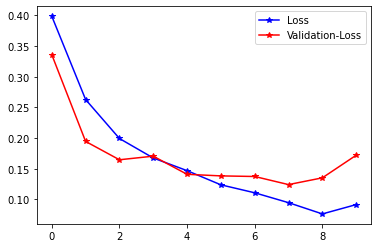

In [68]:
df = pd.DataFrame(history.history)
plt.plot(df.loss, color = "b" , marker ="*" , label = "Loss")
plt.plot(df.val_loss , color = "r" , marker ="*"  , label ="Validation-Loss")
plt.legend()

In [69]:

pred = model.predict(test_x)
pred = (pred>0.5)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
model.evaluate(test_x , test_y)

48/48 [==============================] - 28s 573ms/step - loss: 0.2012 - accuracy: 0.9490


[0.20120757818222046, 0.9490403532981873]

### Saving the model for futher use 

In [ ]:
model.save("my_h5_model.h5")